<a href="https://colab.research.google.com/github/sultanbst123/CNN/blob/main/To_dicoding_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ROCK PAPER SCISSORS CNN

 
"Submission akhir kelas machine learning untuk pemula*

#Data Diri

Nama = Sultan Syach
 
Gmail = sultanbst123@gmail.com
 
No.Hp = 085810260040
 
kota Domisili = Jakarta Timur
 
Tempat/Tanggal Lahir = PadangPanjang,19-07-2002
 
Pendidikan Terakhir = SMK

#import library

In [ ]:
import os
import zipfile
import shutil
import pathlib
import numpy as np
 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
 
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
print("Tensoflow version",tf.__version__)
print("keras version",tf.keras.__version__)

Tensoflow version 2.4.1
keras version 2.4.0


#FILE

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-27 06:48:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1005KB/s    in 4m 8s   

2021-04-27 06:53:03 (1.24 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'
 
DATA = os.path.join(base_dir,"DATA")
 
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(DATA)

In [ ]:
DATA_roc = os.path.join(DATA, 'rock')
DATA_pap = os.path.join(DATA, 'paper')
DATA_sci = os.path.join(DATA, 'scissors')

In [ ]:
os.mkdir(DATA_roc)
os.mkdir(DATA_pap)
os.mkdir(DATA_sci)

In [ ]:
rock = os.listdir(roc_dir)
paper = os.listdir(pap_dir)
scissors = os.listdir(sci_dir)

In [ ]:
for file in rock:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(DATA_roc,file))
for file in paper:
    shutil.copy(os.path.join(pap_dir, file), os.path.join(DATA_pap, file))
for file in scissors:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(DATA_sci,file))

In [ ]:
DATA #data berisi gambar

'/tmp/rockpaperscissors/DATA'

In [ ]:
os.listdir(DATA)

['paper', 'scissors', 'rock']

In [ ]:
#jumlah gambar batu
len(os.listdir(DATA_roc))

726

In [ ]:
#jumlah gambar kertas
len(os.listdir(DATA_pap))

712

In [ ]:
#jumlah gambar gunting
 len(os.listdir(DATA_sci))

750

---------------------------------------

#PREPROCESSING IMAGE

In [ ]:
#mengunakan augmentation image pada data train Dan melakukan split 40%
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = "nearest", 
                                   validation_split = 0.4)
 

val_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.4)

In [ ]:
img_height = 120#tinggi gambar
img_width = 120#lebar gambar
 
train = train_datagen.flow_from_directory(DATA,
                                    target_size = (img_width,img_height),
                                    seed = 12345, 
                                    class_mode = "categorical",
                                    subset  = "training")
 
validation = val_datagen.flow_from_directory(DATA,
                                    target_size = (img_width,img_height),
                                    seed = 12345, 
                                    class_mode = "categorical",
                                    subset  = "validation")

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
for images_batch,labels_batch in train:
    print(images_batch.shape)
    break
 
#120x120

(32, 120, 120, 3)


In [ ]:
print(1314//32) 
print(874//32)

41
27


___

#PEMBUATAN MODEL

In [ ]:
model = Sequential()
 
model.add(layers.Conv2D(64,(5,5),activation="relu",input_shape=(img_width,img_height,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
 
model.add(layers.Conv2D(64,(3,3),activation="relu",padding="Same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2)) 
 
model.add(layers.Conv2D(128,(3,3),activation="relu",padding="Same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.3))
 
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(3,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 116, 116, 64)      4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 116, 116, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 58, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0

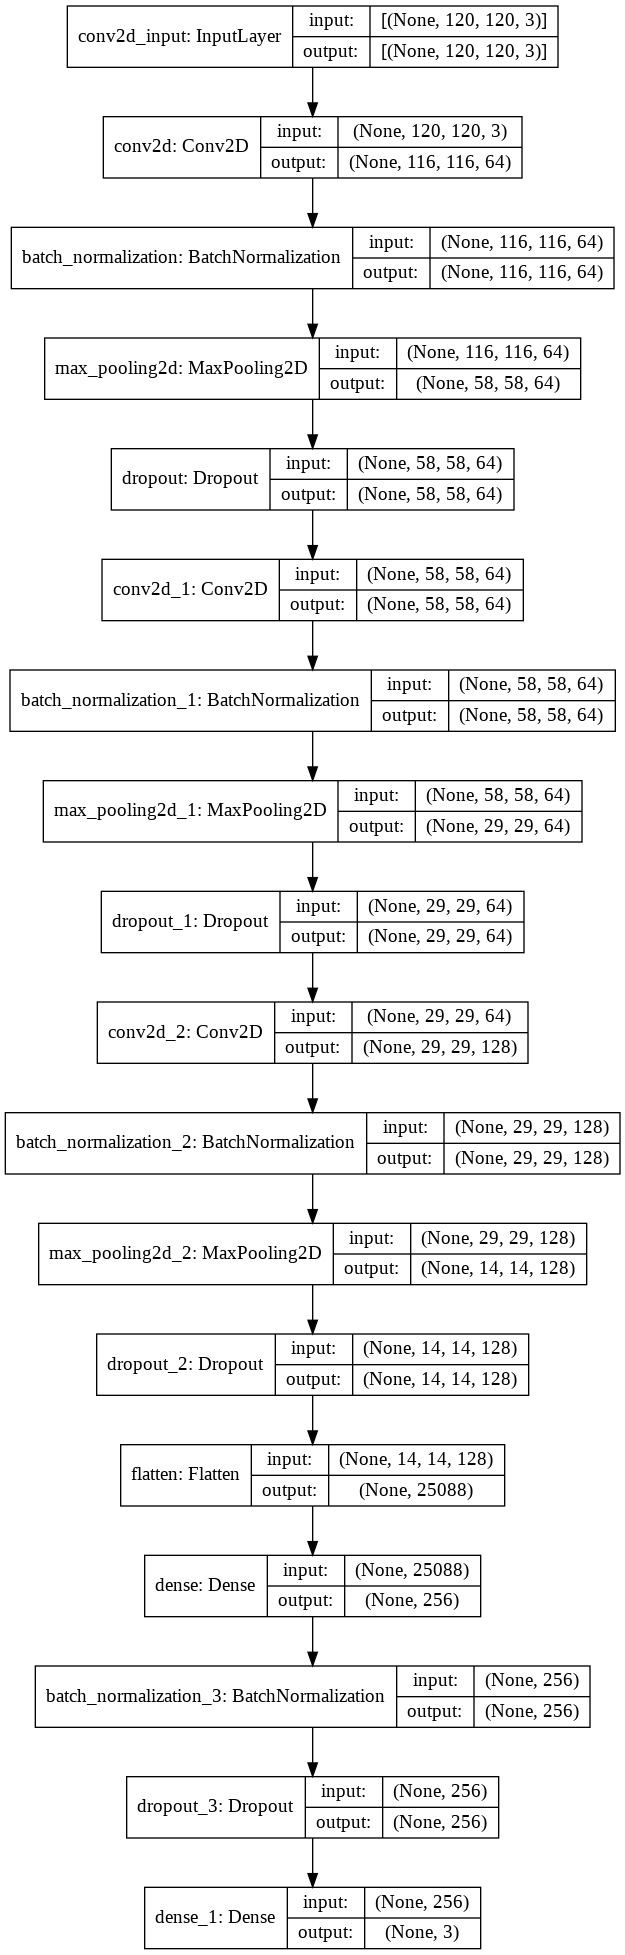

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
RMS = tf.keras.optimizers.RMSprop(learning_rate=0.001)
ADAM = tf.keras.optimizers.Adam(learning_rate = 0.001)
SGD = tf.keras.optimizers.SGD(learning_rate = 0.001) 
 
model.compile(optimizer=SGD,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#callbacks, jaga-jaga jika accuracy train > 98%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\naccuracy data train di atas 98%, hentikan training!")
      self.model.stop_training = True
 
callbacks = myCallback()

In [ ]:
steps = 1314//32#counttrain//batchsize
val_steps = 874//32#countval//batchsize
 
epoch = 15
 
scores = model.fit(train,
                    steps_per_epoch = steps,
                    epochs = epoch, 
                    validation_data = validation,
                    validation_steps = val_steps, 
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/15
41/41 [==============================] - 63s 2s/step - loss: 0.1570 - accuracy: 0.9532 - val_loss: 0.0894 - val_accuracy: 0.9711
Epoch 2/15
41/41 [==============================] - 63s 2s/step - loss: 0.1686 - accuracy: 0.9454 - val_loss: 0.1122 - val_accuracy: 0.9711
Epoch 3/15
41/41 [==============================] - 63s 2s/step - loss: 0.1634 - accuracy: 0.9446 - val_loss: 0.1225 - val_accuracy: 0.9688
Epoch 4/15
41/41 [==============================] - 63s 2s/step - loss: 0.1560 - accuracy: 0.9438 - val_loss: 0.1286 - val_accuracy: 0.9688
Epoch 5/15
41/41 [==============================] - 63s 2s/step - loss: 0.1719 - accuracy: 0.9454 - val_loss: 0.1251 - val_accuracy: 0.9699
Epoch 6/15
41/41 [==============================] - 63s 2s/step - loss: 0.1435 - accuracy: 0.9477 - val_loss: 0.1156 - val_accuracy: 0.9734
Epoch 7/15
41/41 [==============================] - 63s 2s/step - loss: 0.1678 - accuracy: 0.9485 - val_loss: 0.1142 - val_accuracy: 0.9734
Epoch 8/15
41/41 [==

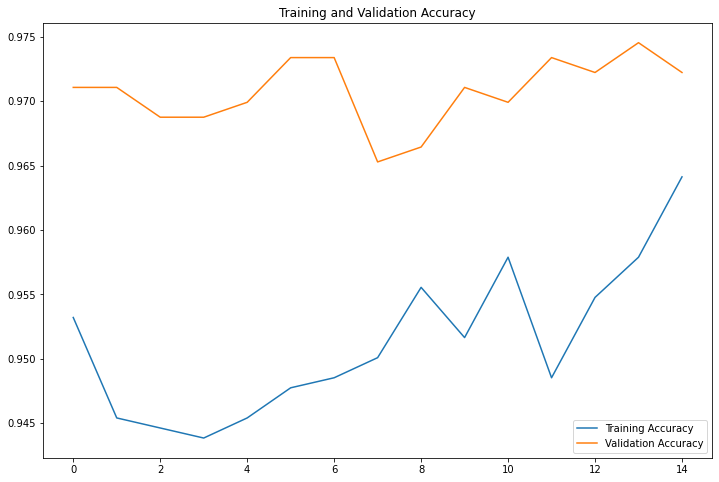

In [ ]:
#accuracy plot
epochs_range = range(epoch) 
acc = scores.history['accuracy']
val_acc = scores.history['val_accuracy']
 
 
plt.figure(figsize = (12,8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

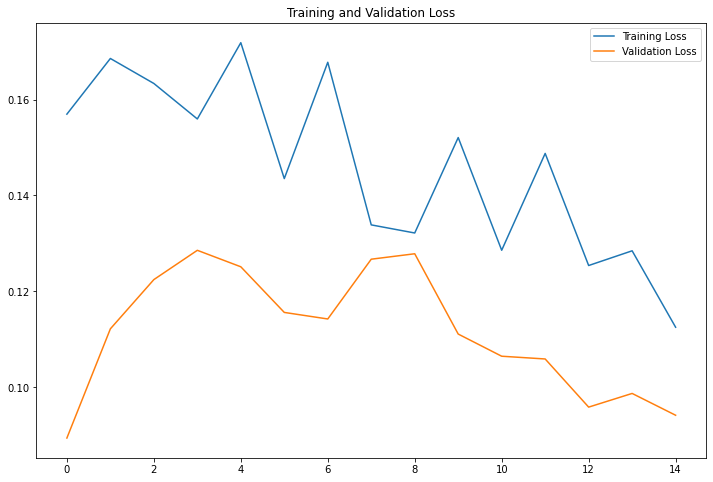

In [ ]:
#loss plot
 
loss = scores.history['loss']
val_loss = scores.history['val_loss']
 
plt.figure(figsize = (12,8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#MENCOBA MODEL

Saving images (2).jpeg to images (2) (9).jpeg


Hasil Prediksi :  [0. 0. 1.] 

Kategori Gambar : Scissor


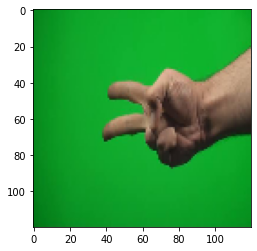

In [ ]:
# Upload File ke google colabs
uploaded = files.upload()
 
# pengkondisian
for file_upload in uploaded.keys():
 
  path = file_upload
  img = image.load_img(path,target_size=(120,120))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  # Membuat numpy vstack array untuk hasil prediksi 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')
 
  if classes[0][0] == 1:
    print('Kategori Gambar : Paper')
  elif classes[0][1] == 1:
    print('Kategori Gambar : Rock')
  elif classes[0][2] == 1:
    print('Kategori Gambar : Scissor')

#KESIMPULAN

-kita bisa liat model nya di over/underfit
 
 
-Saya mengunakan batch normalization untuk mempercepat proses pelatihan Dan bisa juga meningkatkan accuracy
 
 
-Saya mencoba 3 optimizers(ADAM,RMS,SGD) dan Dari ketiga optimizers itu SGD lah yang terbaik

#PENUTUP

Terima kasih Dicoding Dan Lintaserta, yang telah memberikan Saya beasiswa ini saya harap saya bisa lanjut ke tahap berikut nya